In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

import nengo
from nengo.utils.matplotlib import rasterplot
from nengo.dists import Uniform
from nengo.processes import Piecewise

import math

In [1]:
### CHECKPOINT 1 PROGRESS

# model = nengo.Network(label="DTW")


# ### TEST CURVES
# curveA = [
#     [0.02, 0.1],
#     [0.04, 0.3],
#     [0.06, 0.4],
#     [0.08, 0.9],
#     [0.1, 0.8],
#     [0.12, 0.2],
#     [0.14, 0.1],
#     [0.16, 0.5],
#     [0.18, 0.7],
#     [0.2, 0.3],
# ]
# curveB = [
#     [0.02, 0.1],
#     [0.04, 0.6],
#     [0.06, 0.2],
#     [0.08, 0.3],
#     [0.1, 0],
#     [0.12, 0.9],
#     [0.14, 0.4],
#     [0.16, 0.3],
#     [0.18, 0.6],
#     [0.2, 0.3],
# ]

# costMatrix = []

# numPoints = len(curveA)

# with model:

#     def absVal(x):
#         return abs(x)

#     def neg(x):
#         return x * -1

#     def lessThan(x):
#         if x[0]<x[1]:
#             return x[0]
#         else:
#             return x[1]

#     def greaterThan(x):
#         if x[0]>x[1]:
#             return x[0]
#         else:
#             return x[1]

#     for r in range(numPoints):

#         costMatrix.append([])

#         for c in range(numPoints):

#             below = 10
#             belowLeft = 10
#             left = 10

#             input_neuronA = nengo.Ensemble(100, dimensions=1)
#             input_neuronB = nengo.Ensemble(100, dimensions=1)

#             absValCalc = nengo.Ensemble(100, dimensions=1)
#             negative = nengo.Ensemble(100, dimensions=1)
#             difference = nengo.Ensemble(100, dimensions=1)
#             addNum = nengo.Ensemble(100, dimensions = 1)
#             DTWsum = nengo.Ensemble(100, dimensions=1)

#             input_nodeA = nengo.Node(output=curveA[r][1])
#             input_nodeB = nengo.Node(output=curveB[c][1])

#             nengo.Connection(
#                 input_nodeA, input_neuronA
#             )  ## Connect the node to the neuron ensemble
#             nengo.Connection(input_nodeB, input_neuronB)

#             nengo.Connection(
#                 input_neuronB, negative, function=neg
#             )  ## Flip the number negative to subtract

#             nengo.Connection(negative, difference)  ## Subtraction
#             nengo.Connection(input_neuronA, difference)  ## Subtraction

#             nengo.Connection(difference, absValCalc, function=absVal)

#             ### START CALCULATING MINIMUMS, TODO: IMPLEMENT NEURON DYNAMICS

#             if r > 0: ## check below
#                 below = costMatrix[r - 1][c]
#                 isBelow = 1

#             if c > 0: ## check left

#                 left = costMatrix[r][c - 1]
#                 isLeft = 1

#             if r > 0 & c > 0: ## check left and below

#                 belowLeft = costMatrix[r - 1][c - 1]
#                 isBelowLeft = 1


#             if (isBelow | isLeft | isBelowLeft):


#                 ### ONE AT A TIME
#                 if (isBelow == 1 & isLeft == 0 and isBelowLeft == 0):

#                     nengo.Connection(isBelow, addNum)

#                 elif (isBelow == 0 & isLeft == 1 and isBelowLeft == 0):

#                     nengo.Connection(isLeft, addNum)

#                 elif (isBelow == 0 & isLeft == 0 and isBelowLeft == 1):

#                     nengo.Connection(isBelowLeft, addNum)


#                 ### COMBOS OF TWO


#                 ### ALL THREE


#             #####

#             nengo.Connection(absValCalc, DTWsum)
#             nengo.Connection(addNum, DTWsum)

#             costMatrix[r].append(DTWsum)

#     ### neuron_probe = nengo.Probe(difference, synapse = 0.1) ## Probe the neuron ensemble

IndentationError: expected an indented block after 'if' statement on line 95 (1054588099.py, line 101)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

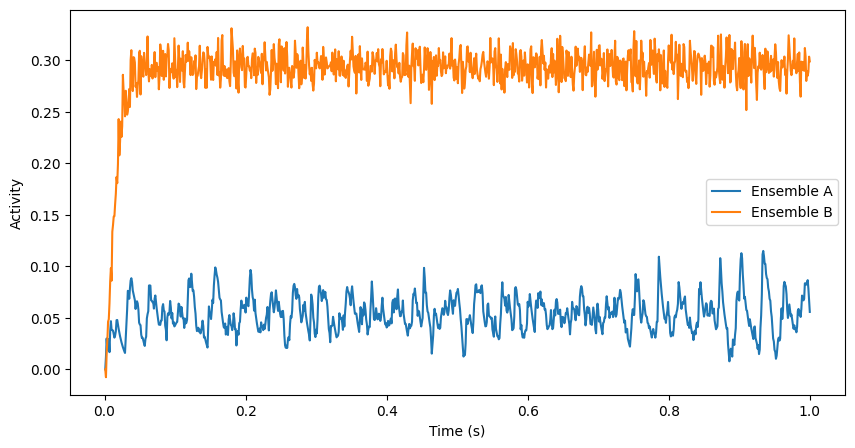

In [48]:
### CODE TO KEEP
### CHECKPOINT 2 PROGRESS

# For each neuron ensemble, x[0] is the current sin value, x[1] is the current cos value, x[2-4] are the neighbors from the cost matrix

costMatrix = []
ensembleMatrix = []

# change this value to adjust the sampling increment
increment = 0.1

lowBound = 0
highBound = increment

simTime = 10


def calcCost(x):

    cost = np.abs(x[0] - x[1]) + np.min(x[2], x[3], x[4])


with nengo.Network() as model:

    input1 = nengo.Node(np.sin)
    input2 = nengo.Node(np.cos)

    # initialize matrices

    for r in range(10):

        costMatrix.append([])
        ensembleMatrix.append([])

        for c in range(10):

            costEns = nengo.Ensemble(100, dimensions=1, radius=2)
            costMatrix[r][c].append(costEns)

            ensemble = nengo.Ensemble(100, dimensions=5)
            ensembleMatrix[r][c].append(ensemble)

    # make the connections between the matrices
    ### TODO: BUILD A LOOP AROUND THIS CODE

    inhib = nengo.Node(Piecewise({0: 1, lowBound: 0, highBound: 1}))

    if c < simTime / increment:

        ## TODO: create an inhibition function to delay the propogation of the sin / cos curves

        nengo.Connection(
            ensembleMatrix[r][c - 1],
        )

    nengo.Connection((costMatrix[r - 1][c]), (ensembleMatrix[r][c])[2])
    nengo.Connection((costMatrix[r][c - 1]), (ensembleMatrix[r][c])[3])
    nengo.Connection((costMatrix[r - 1][c - 1]), (ensembleMatrix[r][c])[4])

    lowBound += 0.1
    highBound += 0.1

    ### TODO: COST MATRIX NEEDS TO BE DELAYED BY THE AMOUNT OF TIME IT TAKES TO COMPLETE NEIGHBORS

    for r in range(10):

        for c in range(10):

            nengo.Connection(ensembleMatrix[r][c], costMatrix[r][c], function=calcCost)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

0.04032382804274631


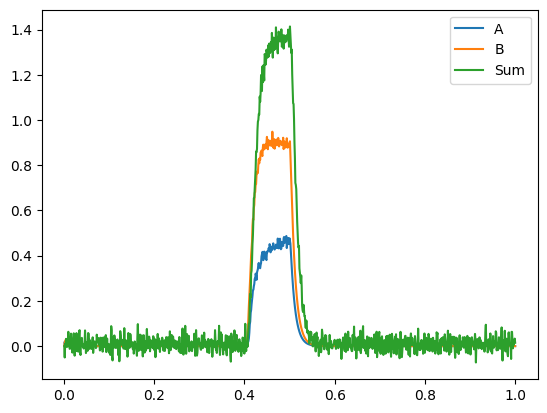

In [76]:
### TESTING

n_neurons = 100

model = nengo.Network(label="Inhibitory Gating")
with model:
    A = nengo.Ensemble(n_neurons, dimensions=1)
    B = nengo.Ensemble(n_neurons, dimensions=1)
    sum = nengo.Ensemble(n_neurons, dimensions=1, radius=2)

    lowBound = 0.4
    highBound = 0.5

    sin = nengo.Node(np.sin)
    cos = nengo.Node(np.cos)
    inhib = nengo.Node(Piecewise({0: 1, lowBound: 0, highBound: 1}))

    nengo.Connection(sin, A)
    nengo.Connection(cos, B)
    nengo.Connection(inhib, A.neurons, transform=[[-2.5]] * n_neurons)
    nengo.Connection(inhib, B.neurons, transform=[[-2.5]] * n_neurons)

    nengo.Connection(A, sum)
    nengo.Connection(B, sum)

    A_probe = nengo.Probe(A, synapse=0.01)
    B_probe = nengo.Probe(B, synapse=0.01)
    total = nengo.Probe(sum, synapse=0.01)

with nengo.Simulator(model) as sim:
    sim.run(1)

plt.figure()
plt.plot(sim.trange(), sim.data[A_probe], label="A")
plt.plot(sim.trange(), sim.data[B_probe], label="B")
plt.plot(sim.trange(), sim.data[total], label="Sum")
# plt.plot(sim.trange(), sim.data[sin_probe], label="Sine input")
# plt.plot(sim.trange(), sim.data[inhib_probe], label="Inhibitory signal")
plt.legend()

ans = np.mean(sim.data[A_probe])
print(ans)